# For homecage usv, try embedding spectrograms and embedding latent means

## import modules

In [2]:
import h5py
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
from ava.data.data_container import DataContainer
import audio_utils.io

In [4]:
%matplotlib inline

## ava project path

In [5]:
root = '/mnt/labNAS/usv_calls/usv_note_analysis/03_16_01'
audio_dirs = [os.path.join(root, 'audio')]
seg_dirs = [os.path.join(root, 'segs')]
proj_dirs = [os.path.join(root, 'projections')]
spec_dirs = [os.path.join(root, 'specs')]
model_filename = os.path.join(root, 'checkpoint_600.tar')
plots_dir = root
dc = DataContainer(projection_dirs=proj_dirs, spec_dirs=spec_dirs, plots_dir=plots_dir, model_filename=model_filename)

In [6]:
onsets = dc.request('onsets')
offsets = dc.request('offsets')
ava_embedding_detections = pd.DataFrame(np.vstack([onsets, offsets]).T, columns=['onsets', 'offsets'])
ava_embedding_detections = ava_embedding_detections.sort_values('onsets',ascending=True)
ava_embedding_detections

Reading field: onsets
	Done with: onsets
Reading field: offsets
	Done with: offsets


,onsets,offsets
4235,0.0270,0.1015
4236,0.1445,0.2095
4237,0.4505,0.4930
4238,0.5150,0.6180
4239,0.7509,0.8074
...,...,...
4230,4136.0148,4136.0578
4231,4136.0728,4136.1148
4232,4137.4921,4137.5376
4233,4171.7482,4171.8362


## embed latent means

In [7]:
latent_means = dc.request('latent_means')

Reading field: latent_means
	Done with: latent_means


In [8]:
# try umap
transform = umap.UMAP(n_components=2, n_neighbors=50, min_dist=0.5, metric='euclidean', random_state=42)
embedding = transform.fit_transform(latent_means)

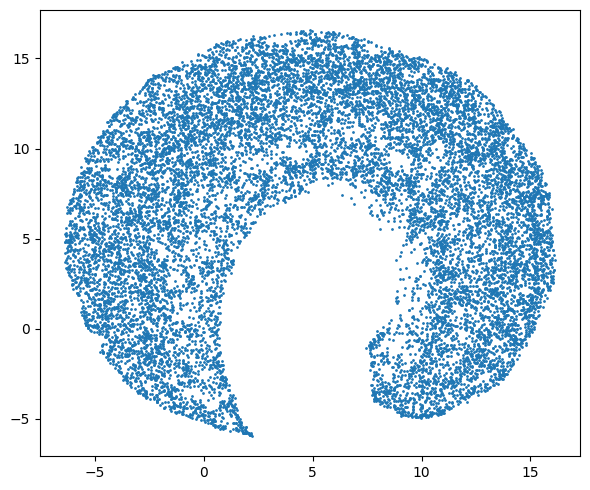

In [9]:
fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(embedding[:,0], embedding[:,1], s=1)
plt.tight_layout()
plt.show()

In [12]:
# from ava.plotting.tooltip_plot import tooltip_plot_DC
# from ava.plotting.latent_projection import latent_projection_plot_DC
# latent_projection_plot_DC(dc)
# tooltip_plot_DC(dc, num_imgs=2000)

## get features

In [10]:
manual_filepath = glob.glob(os.path.join(root, 'usvseg', '*_repertoire.csv'))[0]
manual_detections = pd.read_csv(manual_filepath)
manual_detections = manual_detections.rename(columns={'xEnd':'end'})
manual_detections

,Var1,start,end,duration,maxfreq,maxamp,meanfreq,cvfreq,min,max_fund,max_cand,in_song,detection_side,has_overlap,code,overlap_idx,manual_type
0,0,0.0455,0.0860,40.5,34.881,-68.18,55.359,0.4138,32891.2585,87253.6820,87253.6820,0,left,0.0000,0,NaN,7.0
1,1,0.4670,0.4780,11.0,39.035,-70.90,43.612,0.1377,37213.1803,51552.8404,51552.8404,0,left,0.0000,0,NaN,10.0
2,2,0.5300,0.6130,83.0,17.393,-55.29,29.010,0.5151,15797.1524,71163.7279,71163.7279,0,left,0.0000,0,NaN,7.0
3,3,0.7659,0.7924,26.5,34.075,-71.97,57.900,0.2231,34075.0318,73099.3484,73099.3484,0,left,0.0000,0,NaN,7.0
4,4,0.9614,0.9904,29.0,61.945,-65.47,53.474,0.2846,23376.6953,73065.0921,73065.0921,0,left,0.0000,0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14653,14653,4131.2084,4131.2349,26.5,21.495,-74.97,25.683,0.4755,16398.4381,53082.5288,53082.5288,0,left,0.0115,6,5072.0,2.0
14654,14654,4134.1130,4134.1570,44.0,21.566,-66.97,21.424,0.2107,15583.0748,31250.5078,31250.5078,0,left,0.0375,6,5073.0,3.0
14655,14655,4134.6655,4134.7185,53.0,21.589,-66.34,22.725,0.2257,15547.3952,34320.2703,34320.2703,0,left,0.0395,6,5074.0,4.0
14656,14656,4137.5041,4137.5346,30.5,16.906,-73.51,20.891,0.1394,16905.8620,26189.6533,26189.6533,0,left,0.0270,6,5076.0,4.0


In [11]:
usvseg_filepaths = glob.glob(os.path.join(root, 'usvseg', '*_combine.csv'))
usvseg_detections = pd.concat([pd.read_csv(f) for f in usvseg_filepaths], ignore_index=True)
# usvseg_detections = usvseg_detections[usvseg_detections.duration<170]
usvseg_detections = usvseg_detections[usvseg_detections.code != 6]
usvseg_detections = usvseg_detections.sort_values('start',ascending=True)
usvseg_detections

,Unnamed: 0,start,end,duration,maxfreq,maxamp,meanfreq,cvfreq,in_song,detection_side,usvseg_index,has_overlap,code,overlap_idx
0,0,0.0420,0.0865,44.5,34.878,-68.18,56.154,0.4157,False,left,0,0.0,0,NaN
1,1,0.1595,0.1945,35.0,22.094,-59.70,26.975,0.1882,False,left,1,NaN,4,0.0
2,2,0.4655,0.4780,12.5,39.033,-70.90,43.607,0.1377,False,left,2,0.0,0,NaN
3,3,0.5300,0.6030,73.0,24.512,-57.97,36.178,0.3861,False,left,3,0.0,0,NaN
4,4,0.7659,0.7924,26.5,34.087,-71.97,57.240,0.2915,False,left,4,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15948,15948,4136.0878,4136.0998,12.0,20.192,-70.12,21.833,0.0587,False,right,6633,0.0,1,NaN
15949,15949,4137.5036,4137.5201,16.5,21.508,-72.95,22.916,0.0757,False,left,12411,NaN,2,4065.0
15950,15950,4137.5071,4137.5226,15.5,20.252,-70.61,21.345,0.0442,False,right,6635,NaN,3,4065.0
15952,15952,4171.7632,4171.8212,58.0,30.192,-76.32,28.750,0.0634,False,right,6637,0.0,1,NaN


In [82]:
merged_df = pd.merge(usvseg_detections,manual_detections[['start','end','manual_type']],on=['start','end'])
merged_df

,Unnamed: 0,start,end,duration,maxfreq,maxamp,meanfreq,cvfreq,in_song,detection_side,usvseg_index,has_overlap,code,overlap_idx,manual_type
0,359,53.7771,53.8571,80.0,27.698,-56.72,33.365,0.2428,False,right,104,NaN,5,85.0,5.0
1,503,71.1362,71.1982,62.0,26.312,-59.51,32.415,0.1435,False,right,142,NaN,3,116.0,5.0
2,1496,186.4563,186.5267,70.5,27.179,-52.07,28.356,0.1750,False,right,455,NaN,5,366.0,5.0
3,1873,231.8193,231.8463,27.0,26.069,-51.12,28.309,0.2829,False,right,582,0.0,1,NaN,9.0
4,1890,233.1861,233.2446,58.5,21.909,-55.83,27.865,0.1740,False,right,589,0.0,1,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,15784,4079.6867,4079.7577,71.0,30.480,-62.45,26.704,0.1450,False,left,12271,0.0,0,NaN,4.0
387,15793,4083.7856,4083.8621,76.5,29.080,-58.44,24.389,0.1484,False,left,12280,0.0,0,NaN,6.0
388,15806,4086.4413,4086.4927,51.5,31.080,-50.24,26.671,0.2141,False,left,12290,0.0,0,NaN,9.0
389,15809,4086.7547,4086.8197,65.0,23.084,-65.43,27.453,0.1643,False,left,12292,0.0,0,NaN,6.0


In [12]:
for i in range(ava_embedding_detections.shape[0]):
    ava_onset = ava_embedding_detections.iloc[i,0]
    usvseg_onset = usvseg_detections.iloc[i,1]
    if abs(ava_onset+0.015-usvseg_onset)>1e-3:
        print(f'ava detection {i} not matching with usvseg detection {i}')

ava detection 15011 not matching with usvseg detection 15011
ava detection 15012 not matching with usvseg detection 15012
ava detection 15013 not matching with usvseg detection 15013
ava detection 15014 not matching with usvseg detection 15014
ava detection 15015 not matching with usvseg detection 15015
ava detection 15016 not matching with usvseg detection 15016
ava detection 15017 not matching with usvseg detection 15017
ava detection 15018 not matching with usvseg detection 15018
ava detection 15019 not matching with usvseg detection 15019


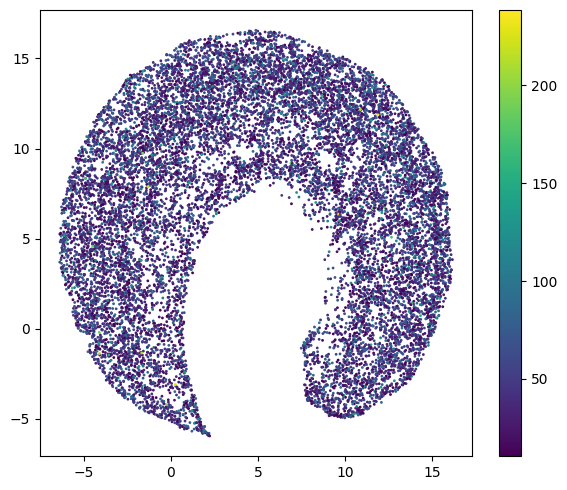

In [14]:
fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(embedding[:15011,0], embedding[:15011,1], s=1, c=usvseg_detections['duration'][:15011])
cbar = plt.colorbar(sc)
plt.tight_layout()
plt.show()

## embed spectrograms

In [16]:
specs = dc.request('specs')

Reading field: specs
	Done with: specs


In [17]:
specs_linearized = specs.reshape(specs.shape[0], -1)
scaler = StandardScaler()
specs_linearized_zscore = scaler.fit_transform(specs_linearized.T).T
specs_linearized_zscore.shape

(15020, 16384)

In [18]:
print(np.mean(specs_linearized_zscore, axis=1).shape)
print(np.mean(specs_linearized_zscore, axis=1))

(15020,)
[ 6.93889390e-18 -1.04083409e-17  3.46944695e-18 ... -1.38777878e-17
 -3.46944695e-18  3.46944695e-17]


In [19]:
# try umap
transform = umap.UMAP(n_components=2, n_neighbors=100, min_dist=0.01, metric='euclidean', random_state=42)
embedding = transform.fit_transform(specs_linearized_zscore)

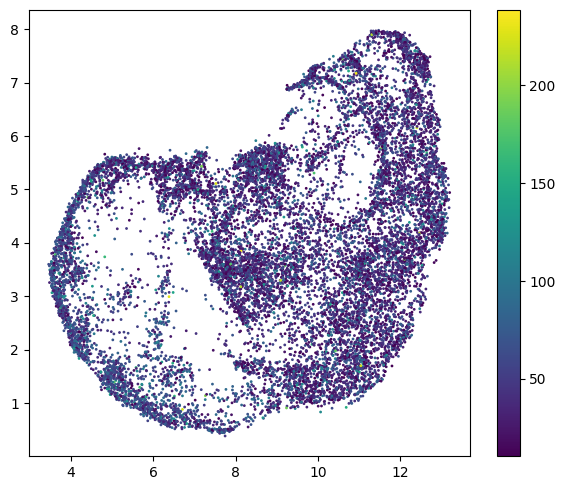

In [20]:
fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(embedding[:15011,0], embedding[:15011,1], s=1, c=usvseg_detections['duration'][:15011])
cbar = plt.colorbar(sc)
plt.tight_layout()
plt.show()